loading counts
(55511L, 10L) size of counts array
(55511L,) size of gene order array
['wt_1', 'wt_2', 'wt_3', 'ctcf_4', 'ctcf_5', 'ctcf_6', 'med12_7', 'med12_8', 'smc1_9', 'smc1_10'] Here are the replicates in this file




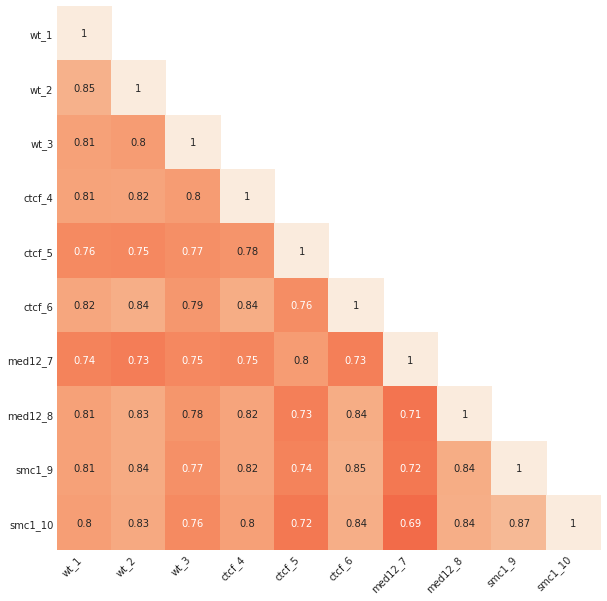

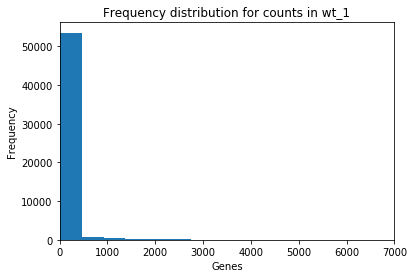

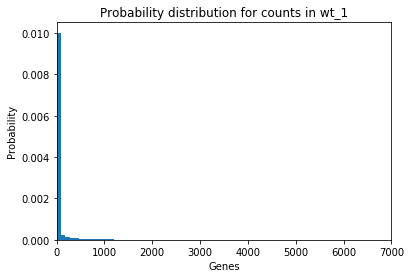

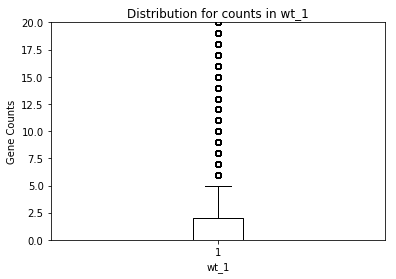

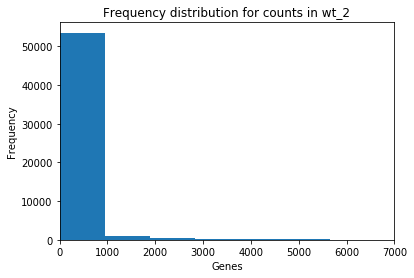

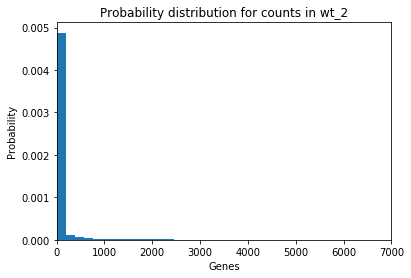

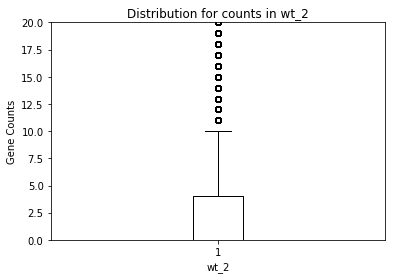

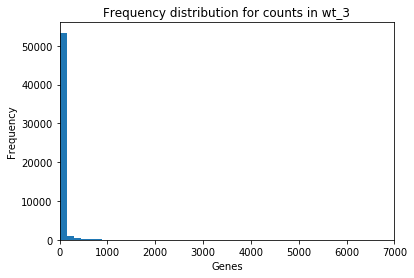

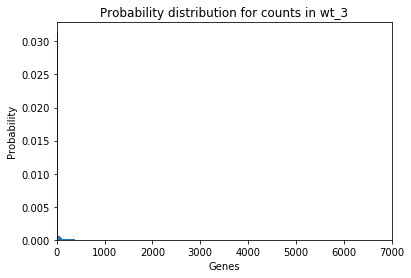

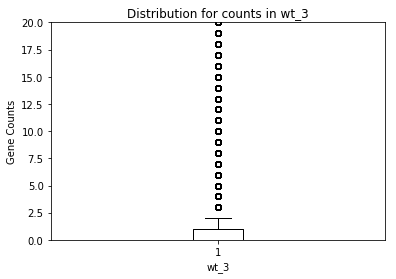

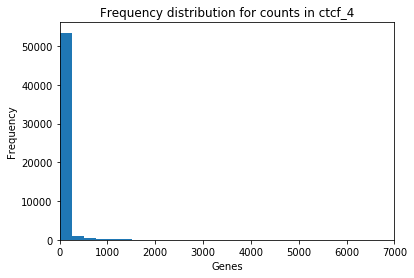

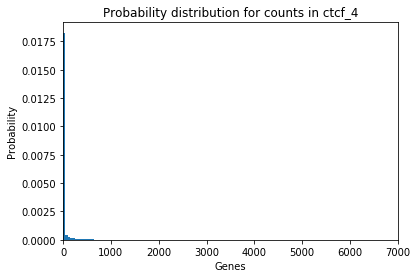

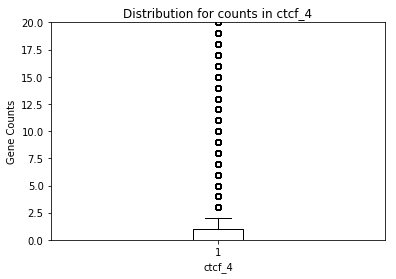

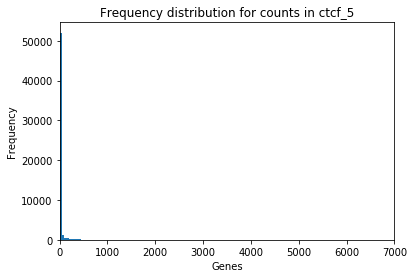

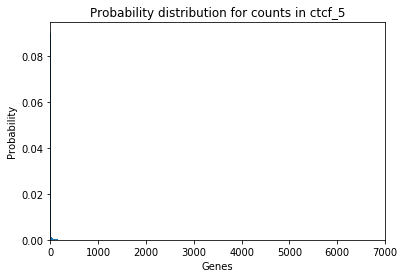

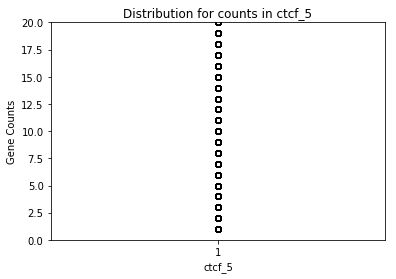

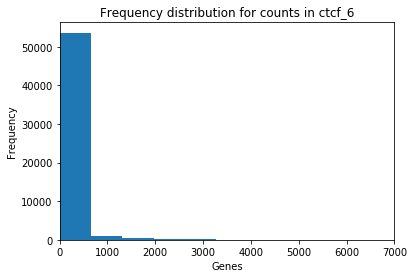

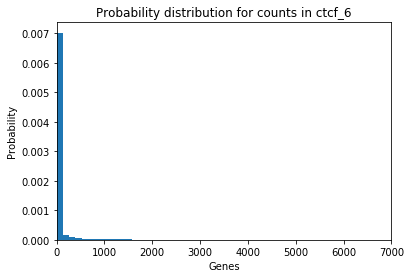

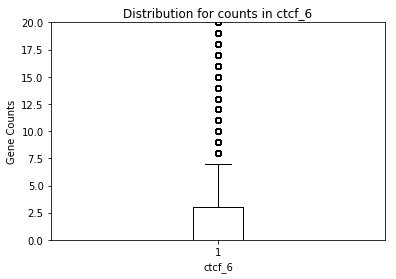

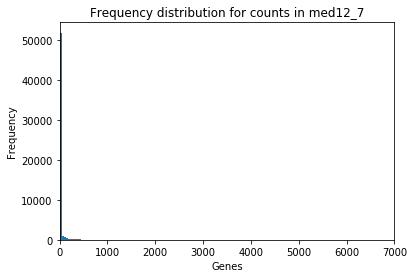

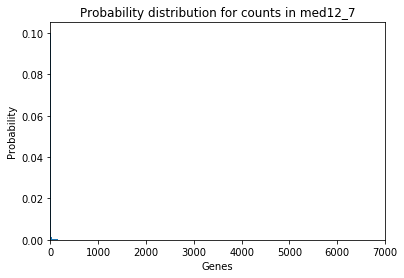

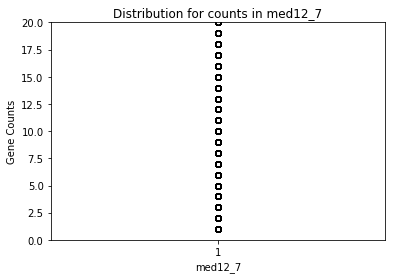

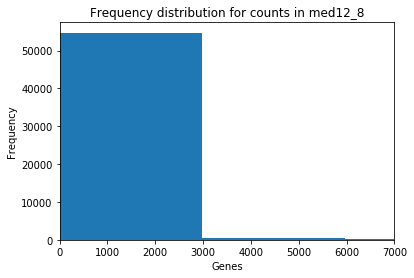

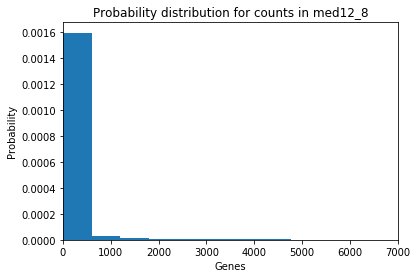

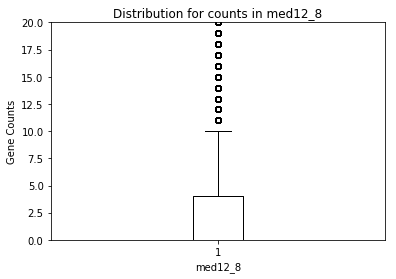

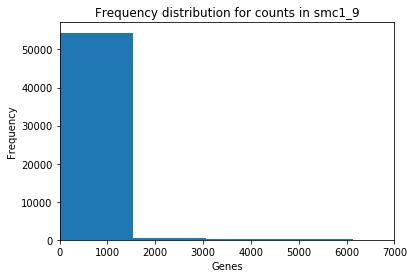

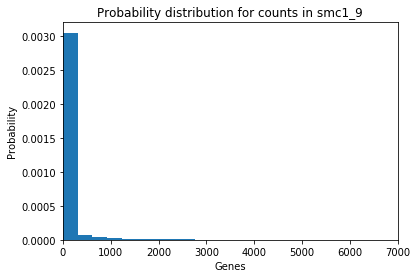

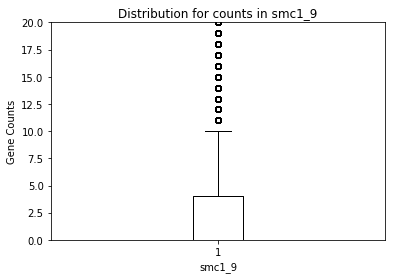

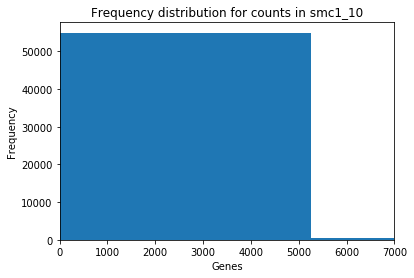

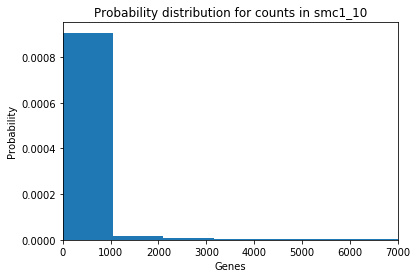

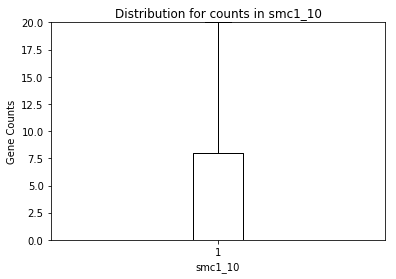

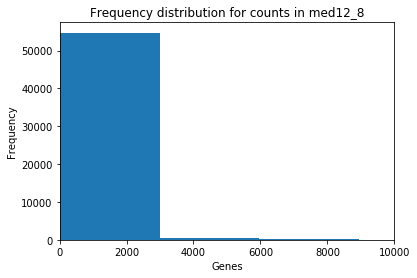

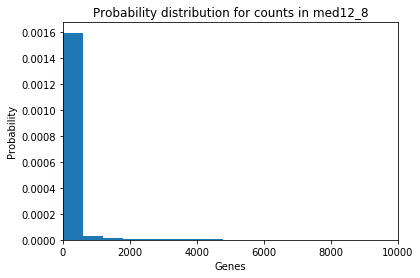

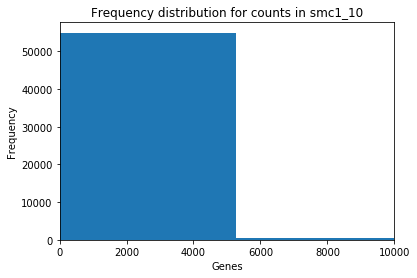

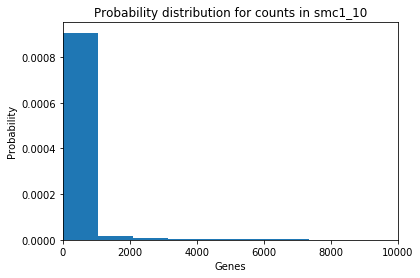

['Sum of Counts', 5526354, 11167189, 1943883, 3148445, 1587430, 7135953, 2019384, 15259061, 10053581, 21636059]
['Mean', 99.554214480012973, 201.17074093422926, 35.01797841869179, 56.717497432941222, 28.596674532975445, 128.55025130154382, 36.378087225955213, 274.88355461079789, 181.10970798580462, 389.76165084397689]
['Population Variance', 4980106.6860368494, 20790805.042058647, 537821.8604971543, 1525649.6944352419, 141863.48491192955, 9779806.6283362582, 224047.16356587532, 171325568.1850678, 46248104.982469767, 513647228.43539858]
['Sample Variance', 4980196.4015238974, 20791179.583673529, 537831.54923540866, 1525677.1786668114, 141866.04055028141, 9779982.8093239777, 224051.19972446957, 171328654.57613581, 46248938.131541692, 513656481.67316538]
['Median', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Standard Deviation', 2231.615263892244, 4559.6935250144443, 733.36338911698772, 1235.171929099444, 376.64769335803658, 3127.2682373496932, 473.33620563598907, 13089.1393217838

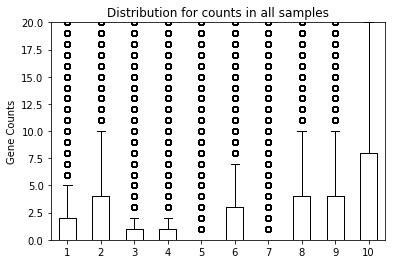

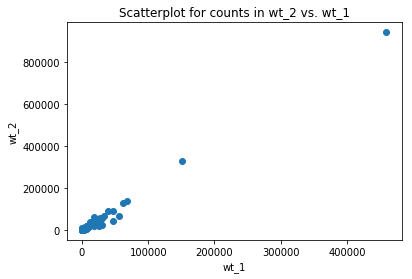

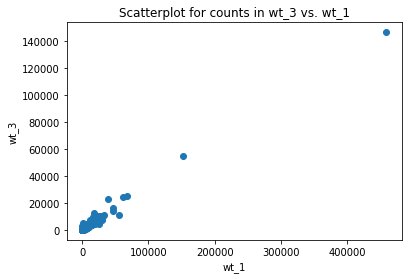

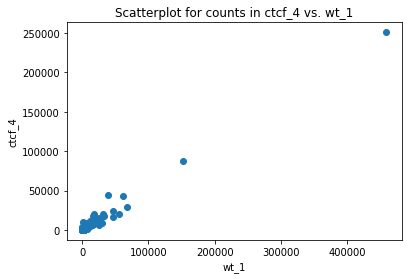

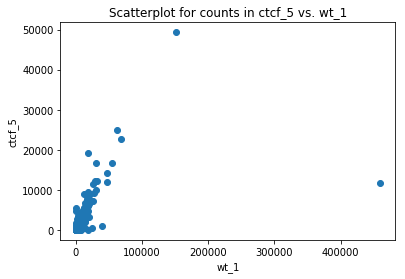

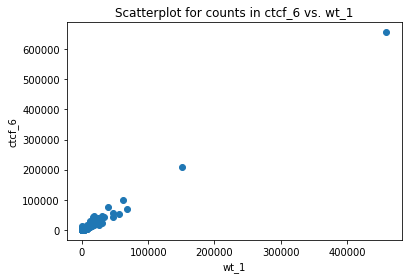

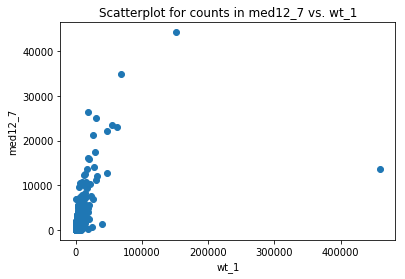

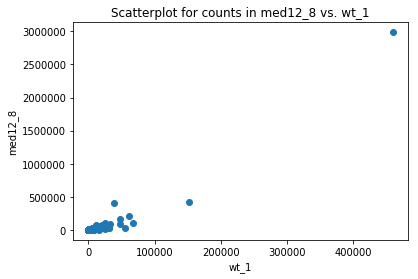

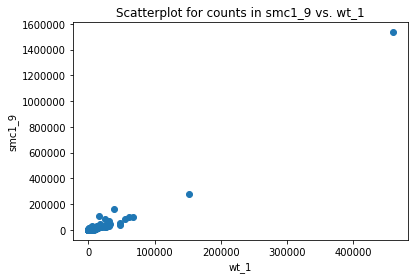

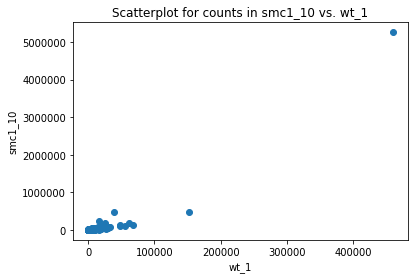

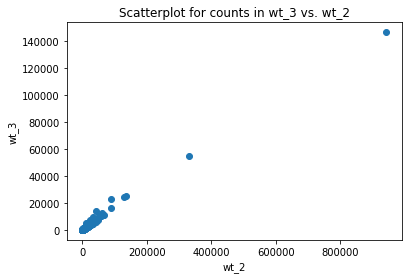

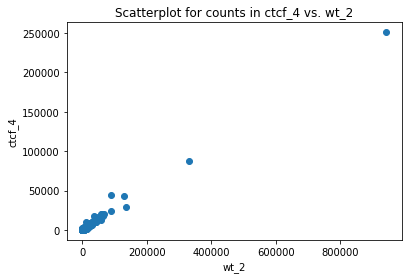

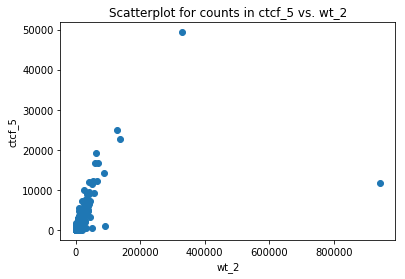

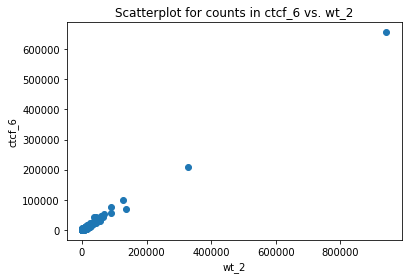

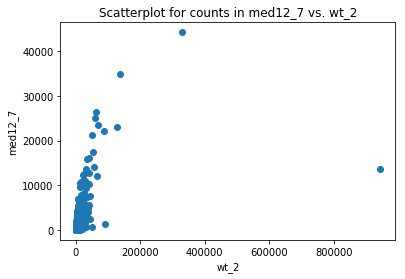

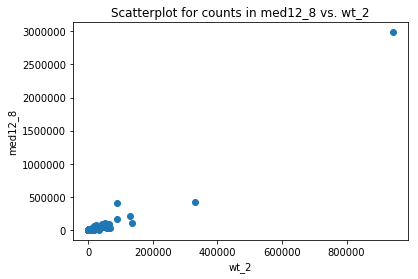

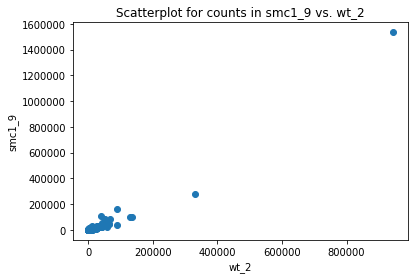

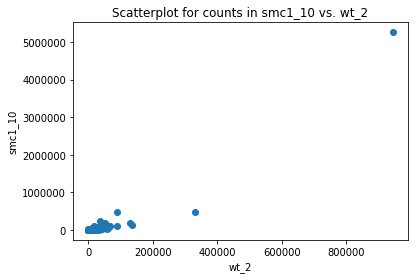

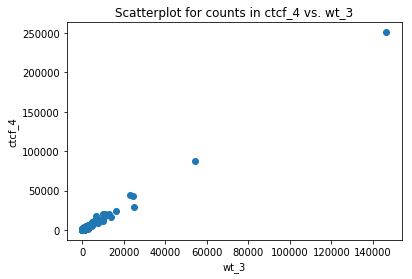

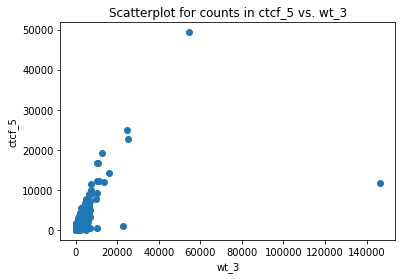

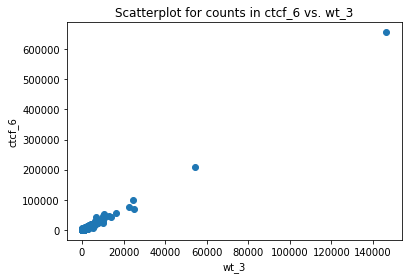

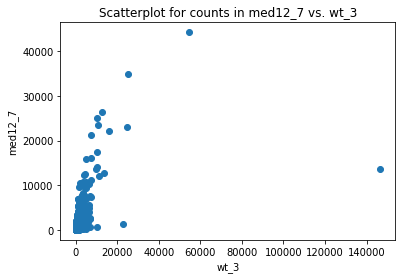

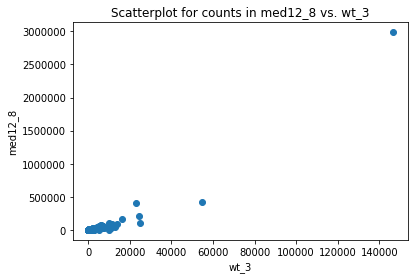

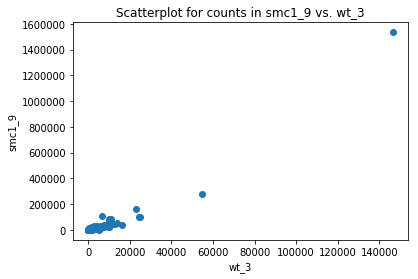

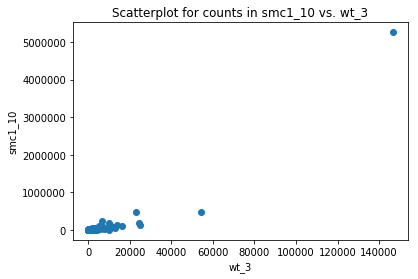

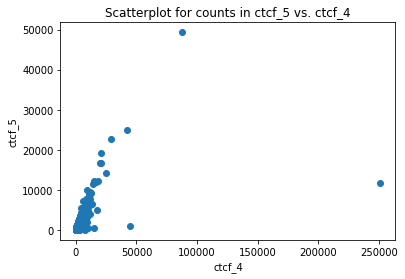

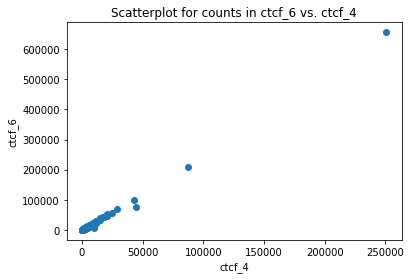

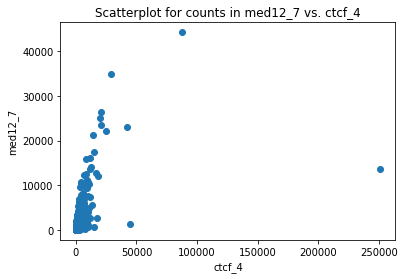

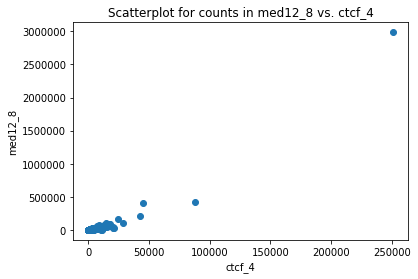

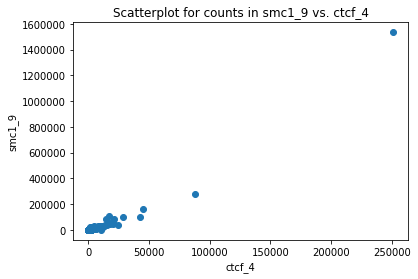

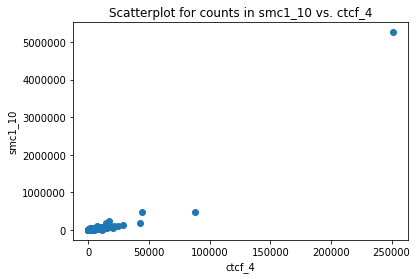

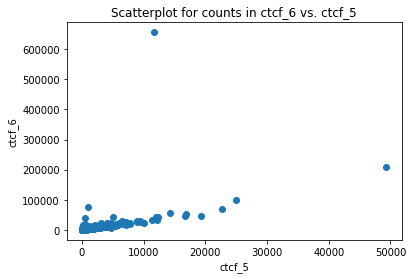

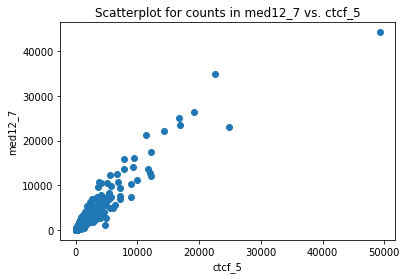

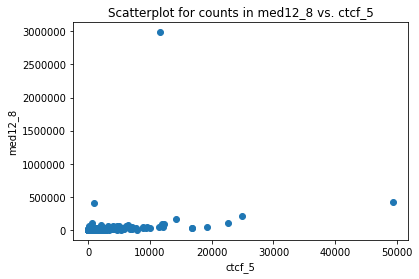

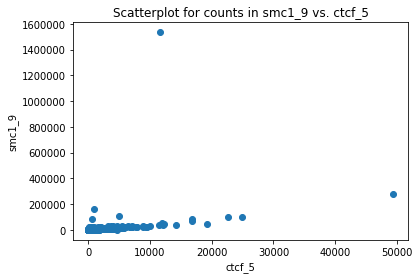

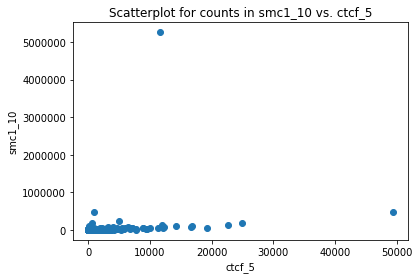

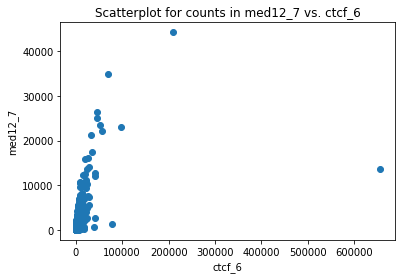

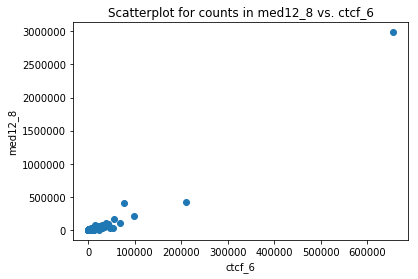

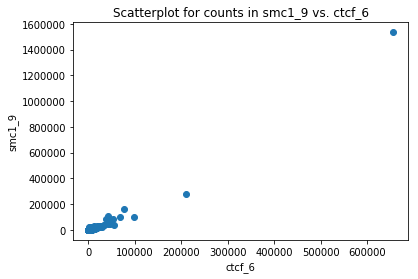

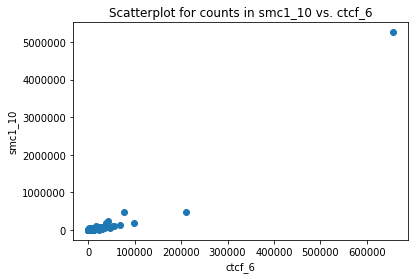

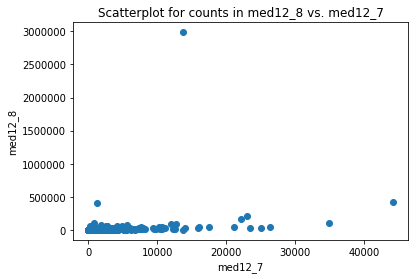

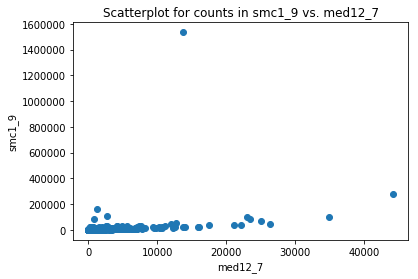

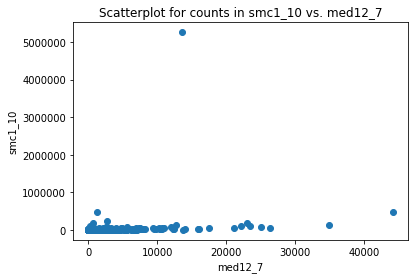

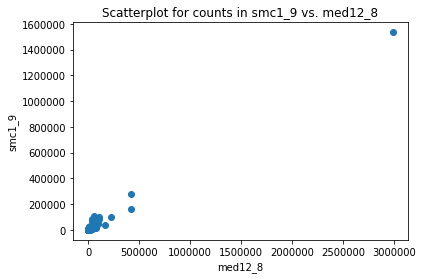

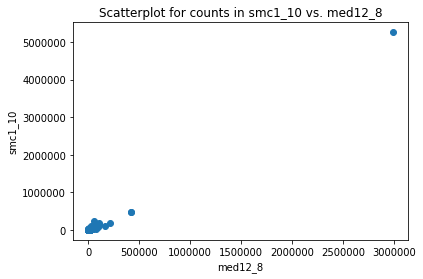

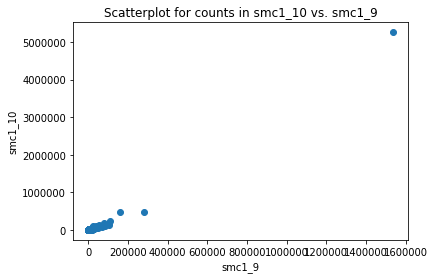

calculating correlations
plotting correlation heatmap


In [2]:
# %load demo_RNAseq_correlation.py
from load_RNAseq_counts import load_RNAseq_counts
from make_pairwise_correlation_matrix import make_pairwise_correlation_matrix
from plot_correlation_matrix import plot_correlation_matrix
from  load_gene_info import load_gene_info
from filter_low_count_genes import filter_low_count_genes
from normalize_by_tpm import normalize_by_tpm
from write_RNAseq_counts import write_RNAseq_counts
from plot_histogram import *
from plot_scatter import *
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns


def main():
    
    print 'loading counts'
    counts_matrix,gene_order,rep_list= load_RNAseq_counts('ARCH_RNAseq_concatenated_counts_2_19_2016.txt',delimiter=' ')
    gene_info = load_gene_info('ucsc_id_to_gene_symbol_11_20_2015_mm9.txt')

    
    #Print information about the dimensions of your counts array and the number of independent samples
    print np.shape(counts_matrix), "size of counts array"
    print np.shape(gene_order), "size of gene order array"
    print rep_list, "Here are the replicates in this file\n\n"

    #Here, for every file, compute descriptive statistics and plot histograms and boxplots

    soc = ['Sum of Counts']
    mean = ['Mean']
    pop_var = ['Population Variance']
    samp_var = ['Sample Variance']
    median = ['Median']
    sd = ['Standard Deviation']
    max_count = ['Maximum Count']
    min_count = ['Minimum Count']
    
    for j in range(0,np.shape(counts_matrix)[1]): 
        #print j, np.shape(counts_matrix[:,j])       
        soc.append(np.sum(counts_matrix[:,j]))#, "here is the sum of counts in sample ", rep_list[j]     
        mean.append(np.mean(counts_matrix[:,j]))# "here is the mean of counts in sample ", rep_list[j]
        pop_var.append(np.var(counts_matrix[:,j]))#, "here is the population variance of counts in sample ", rep_list[j]
        samp_var.append(np.var(counts_matrix[:,j], ddof = 1))#e, "here is the sample variance of counts in sample ", rep_list[j]
        median.append(np.median(counts_matrix[:,j]))#, "here is the median of counts in sample ", rep_list[j]
        sd.append(np.std(counts_matrix[:,j]))#, "here is the sample standard deviation of counts in sample ", rep_list[j]
        max_count.append(np.max(counts_matrix[:,j]))#, "here is the maximum count in sample ", rep_list[j]
        min_count.append(np.min(counts_matrix[:,j]))#, "here is the minimum count in sample ", rep_list[j]


        #Create a counts histogram for all ten samples
        pyplot.figure()
        pyplot.hist(counts_matrix[:,j],1000)
        pyplot.xlim(0,7000)
        pyplot.title('Frequency distribution for counts in '+rep_list[j])
        pyplot.xlabel('Genes')
        pyplot.ylabel('Frequency')
        pyplot.show() 

        #Create a probability distribution for all ten samples
        pyplot.figure()
        pyplot.hist(counts_matrix[:,j],5000,normed=True)
        pyplot.xlim(0,7000)
        pyplot.title('Probability distribution for counts in '+rep_list[j])
        pyplot.xlabel('Genes')
        pyplot.ylabel('Probability')
        pyplot.show()

        #Create a boxplot for all ten samples
        pyplot.figure()
        pyplot.boxplot(counts_matrix[:,j])
        pyplot.ylim(0,20)
        pyplot.title('Distribution for counts in '+rep_list[j])
        pyplot.xlabel(rep_list[j])
        pyplot.ylabel('Gene Counts')
        pyplot.show()

#Plot histograms & probability distributions for 8 and 10

    pyplot.figure()
    pyplot.hist(counts_matrix[:,7],1000)
    pyplot.xlim(0,10000)
    pyplot.title('Frequency distribution for counts in '+rep_list[7])
    pyplot.xlabel('Genes')
    pyplot.ylabel('Frequency')
    pyplot.show() 

    pyplot.figure()
    pyplot.hist(counts_matrix[:,7],5000,normed=True)
    pyplot.xlim(0,10000)
    pyplot.title('Probability distribution for counts in '+rep_list[7])
    pyplot.xlabel('Genes')
    pyplot.ylabel('Probability')
    pyplot.show()

    pyplot.figure()
    pyplot.hist(counts_matrix[:,9],1000)
    pyplot.xlim(0,10000)
    pyplot.title('Frequency distribution for counts in '+rep_list[9])
    pyplot.xlabel('Genes')
    pyplot.ylabel('Frequency')
    pyplot.show() 

    pyplot.figure()
    pyplot.hist(counts_matrix[:,9],5000,normed=True)
    pyplot.xlim(0,10000)
    pyplot.title('Probability distribution for counts in '+rep_list[9])
    pyplot.xlabel('Genes')
    pyplot.ylabel('Probability')
    pyplot.show()
    
    # Display descriptive statistics in the form of a table
    data1 = [soc,mean,pop_var,samp_var,median,sd,max_count,min_count]
    for i in range(len(data1)):    
        print data1[i];


    #Here, create a box plot of counts across all four samples
    data = [counts_matrix[:,0],counts_matrix[:,1],counts_matrix[:,2],counts_matrix[:,3],counts_matrix[:,4],counts_matrix[:,5],counts_matrix[:,6],counts_matrix[:,7],counts_matrix[:,8],counts_matrix[:,9]]
    pyplot.figure()
    pyplot.boxplot(data)
    pyplot.ylim(0,20)
    pyplot.title('Distribution for counts in all samples')
    pyplot.ylabel('Gene Counts')
    pyplot.show()

    # Create scatter plots to explore associations between samples
    for i in range (0,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,0],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[0])
            pyplot.xlabel(rep_list[0])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()


    for i in range (1,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,1],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[1])
            pyplot.xlabel(rep_list[1])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()

    for i in range (2,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,2],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[2])
            pyplot.xlabel(rep_list[2])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()
            
    for i in range (3,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,3],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[3])
            pyplot.xlabel(rep_list[3])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()
    
    for i in range (4,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,4],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[4])
            pyplot.xlabel(rep_list[4])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()
            
    for i in range (5,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,5],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[5])
            pyplot.xlabel(rep_list[5])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()
            
    for i in range (6,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,6],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[6])
            pyplot.xlabel(rep_list[6])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()
            
    for i in range (7,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,7],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[7])
            pyplot.xlabel(rep_list[7])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()
            
    for i in range (8,9):
            pyplot.figure()
            pyplot.scatter(counts_matrix[:,8],counts_matrix[:,i+1])
            pyplot.title('Scatterplot for counts in '+rep_list[i+1]+' vs. '+rep_list[8])
            pyplot.xlabel(rep_list[8])
            pyplot.ylabel(rep_list[i+1])
            pyplot.show()

    
    print 'calculating correlations'
    pearson_matrix = make_pairwise_correlation_matrix(counts_matrix,correlation='pearson',lower_triangle_only=True)
    spearman_matrix = make_pairwise_correlation_matrix(counts_matrix,correlation='spearman',lower_triangle_only=True)
    kendall_tau_matrix = make_pairwise_correlation_matrix(counts_matrix,correlation='kendalltau',lower_triangle_only=True)

    print 'plotting correlation heatmap'
    plot_correlation_matrix(pearson_matrix,'pearson_correlation.png',lower_triangle_only=True,label_values=rep_list)
    plot_correlation_matrix(spearman_matrix,'spearman_correlation.png',lower_triangle_only=True,label_values=rep_list)
    plot_correlation_matrix(kendall_tau_matrix,'kendall_tau_correlation.png',lower_triangle_only=True,label_values=rep_list)

if __name__ == '__main__':
    main()


loading counts
filtering low gene counts
[[25451 19308  4774  6339  7156 17362  7007 20650 22093 42869]
 [ 1607  1754   633   826    22  1950    38  5195  2636  9579]
 [ 6013  6163  1568  2376    60  5666    63 17420  8129 35701]
 [ 1041   833   207   261   134   790    57  1056  1037  1503]
 [    0     0     0     0     0     0     0     3     0     1]
 [    0     1     0     1     1     3     0     3     1     1]
 [   13     8     5     4     3    11     1    19     9    36]
 [    0     0     0     0     0     0     0     3     3     0]
 [   27    28     5    17    10    29     3    37    22    60]
 [  217   220    78    92    53   266    42   367   309   573]]
normalizing by RPKM
gene information is not available for ERCC-00002
gene information is not available for ERCC-00003
gene information is not available for ERCC-00004
gene information is not available for ERCC-00009
gene information is not available for ERCC-00012
gene information is not available for ERCC-00013
gene informati

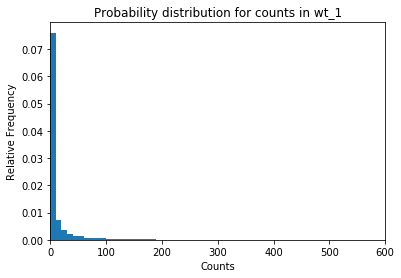

1 (13041L,)
1000000.0 here is the sum of counts in sample  wt_2


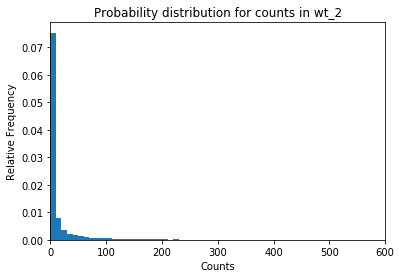

2 (13041L,)
1000000.0 here is the sum of counts in sample  wt_3


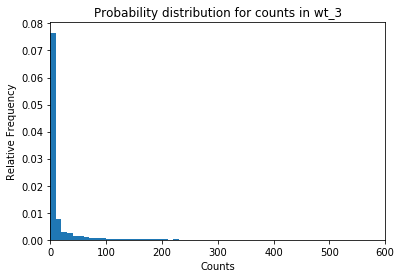

3 (13041L,)
1000000.0 here is the sum of counts in sample  ctcf_4


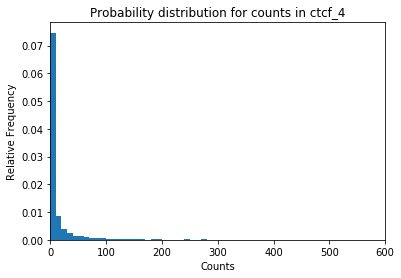

4 (13041L,)
1000000.0 here is the sum of counts in sample  ctcf_5


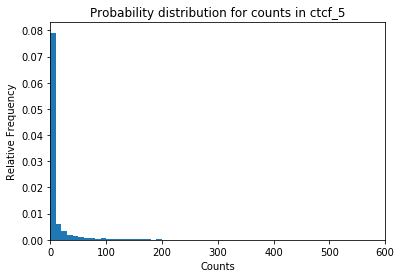

5 (13041L,)
1000000.0 here is the sum of counts in sample  ctcf_6


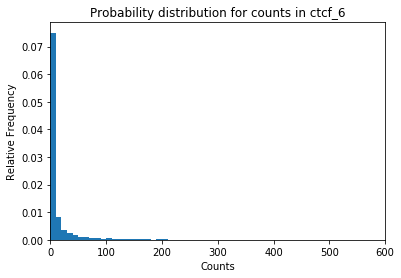

6 (13041L,)
1000000.0 here is the sum of counts in sample  med12_7


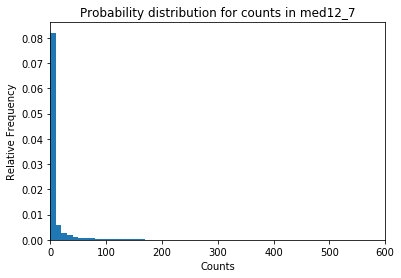

7 (13041L,)
1000000.0 here is the sum of counts in sample  med12_8


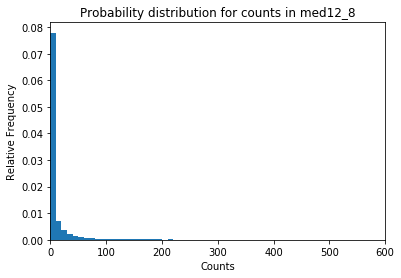

8 (13041L,)
1000000.0 here is the sum of counts in sample  smc1_9


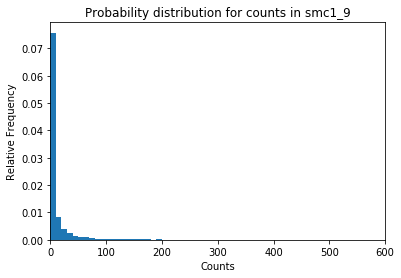

9 (13041L,)
1000000.0 here is the sum of counts in sample  smc1_10


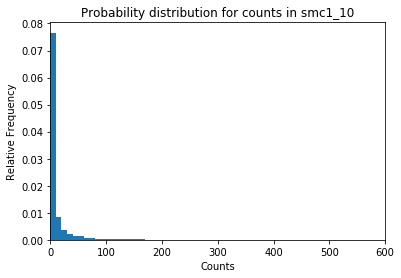

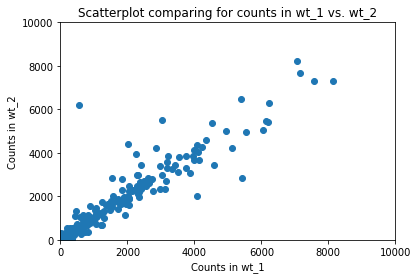

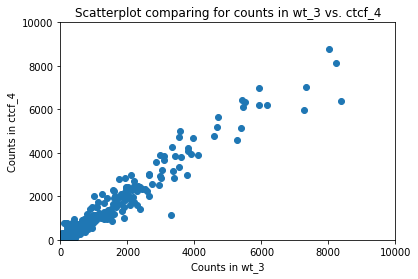

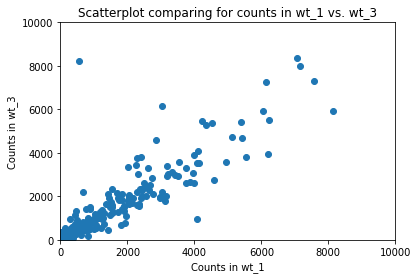

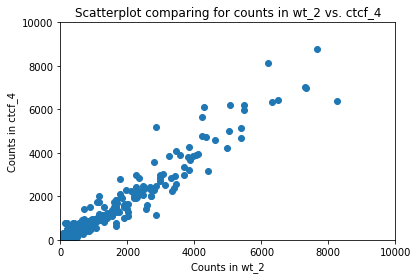

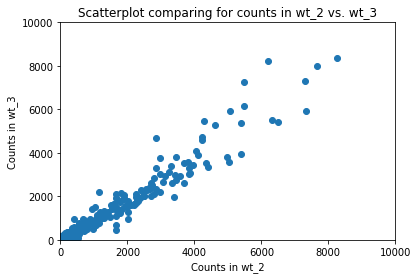

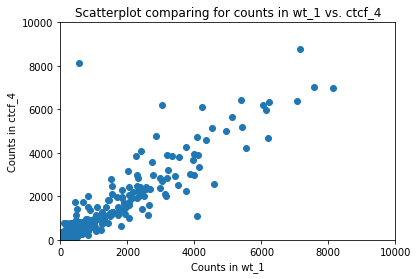

In [2]:
from load_RNAseq_counts import load_RNAseq_counts
from make_pairwise_correlation_matrix import make_pairwise_correlation_matrix
from plot_correlation_matrix import plot_correlation_matrix
from  load_gene_info import load_gene_info
from filter_low_count_genes import filter_low_count_genes
from normalize_by_tpm import normalize_by_tpm
from write_RNAseq_counts import write_RNAseq_counts
from plot_histogram import *
from plot_scatter import *
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns


print 'loading counts'
matrix,gene_order,lib_order = load_RNAseq_counts('ARCH_RNAseq_concatenated_counts_2_19_2016.txt',delimiter=' ')
gene_info = load_gene_info('ucsc_id_to_gene_symbol_11_20_2015_mm9.txt')

#Here are plots for raw data
#histogram(matrix,gene_order,lib_order)
#scatterplot(matrix,gene_order,lib_order)

print 'filtering low gene counts'
new_gene_order,_,filtered_matrix = filter_low_count_genes(gene_order,matrix,count_threshold=0)

print filtered_matrix[0:10,:]

#Here are plots for filtered data
#histogram(filtered_matrix,new_gene_order,lib_order)
#scatterplot(filtered_matrix,new_gene_order,lib_order)


print 'normalizing by RPKM'
corrected_matrix = normalize_by_tpm(new_gene_order,gene_info,filtered_matrix)


print corrected_matrix[0:10,:]

print 'filtering genes with 0 count due to no gene length information'
new_gene_order2,_,no_length_removed_matrix = filter_low_count_genes(new_gene_order,corrected_matrix,count_threshold=0)

print no_length_removed_matrix[0:10,:]

print 'writing output'
write_RNAseq_counts(new_gene_order2,lib_order,no_length_removed_matrix,
                    'output/finalESNPC_tpm_normalized_2_21_2017.txt',delimiter=' ')


#Here are plots for scalar normalized data
histogram(no_length_removed_matrix,new_gene_order2,lib_order)
scatterplot(no_length_removed_matrix,new_gene_order2,lib_order)




In [1]:
import numpy as np
from load_RNAseq_counts import load_RNAseq_counts
from filter_low_count_genes import filter_low_count_genes
from write_RNAseq_counts import write_RNAseq_counts
from plot_histogram import *
from plot_scatter import *
from plot_ma import *
from normalize_by_tpm import *
from load_gene_info import *
#from norm_mle_ttest_v2 import *
#from fishers_exact import *
#from ks_test import *
#from poisson_mle_lrt import *

print 'loading counts'
matrix,gene_order,lib_order = load_RNAseq_counts('ARCH_RNAseq_concatenated_counts_2_19_2016.txt',delimiter=' ')
gene_info = load_gene_info('ucsc_id_to_gene_symbol_11_20_2015_mm9.txt')


print 'filtering low gene counts'
new_gene_order,_,filtered_matrix = filter_low_count_genes(gene_order,matrix,count_threshold=0)

print 'Total reads per million normalization'
precorrected_matrix = normalize_by_tpm(new_gene_order,gene_info,filtered_matrix)
corrected_matrix = np.log2(precorrected_matrix + 1)

#Here are plots for scalar normalized data
#histogram(precorrected_matrix,new_gene_order,lib_order)


print 'writing counts'
write_RNAseq_counts(new_gene_order,lib_order,corrected_matrix,'output/final_ESNPC_filtered_logged_TPM_normalized_3_9_2017.txt',delimiter=' ')
print np.shape(corrected_matrix)
print corrected_matrix[0:10,]





loading counts
filtering low gene counts
Total reads per million normalization
gene information is not available for ERCC-00002
gene information is not available for ERCC-00003
gene information is not available for ERCC-00004
gene information is not available for ERCC-00009
gene information is not available for ERCC-00012
gene information is not available for ERCC-00013
gene information is not available for ERCC-00014
gene information is not available for ERCC-00016
gene information is not available for ERCC-00019
gene information is not available for ERCC-00022
gene information is not available for ERCC-00024
gene information is not available for ERCC-00025
gene information is not available for ERCC-00028
gene information is not available for ERCC-00031
gene information is not available for ERCC-00033
gene information is not available for ERCC-00034
gene information is not available for ERCC-00035
gene information is not available for ERCC-00039
gene information is not available for E

plot_ma.py:12: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,3]) + np.log2(matrix[:,0]))


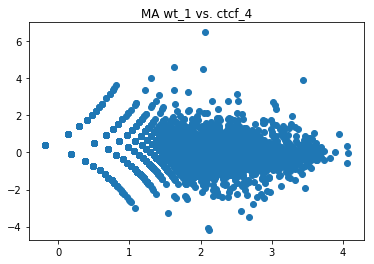

plot_ma.py:21: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,4]) + np.log2(matrix[:,0]))


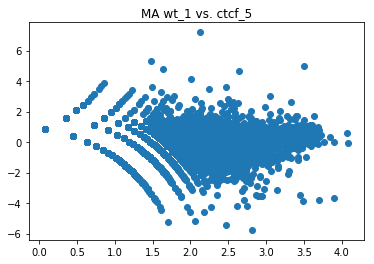

plot_ma.py:30: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,5]) + np.log2(matrix[:,0]))


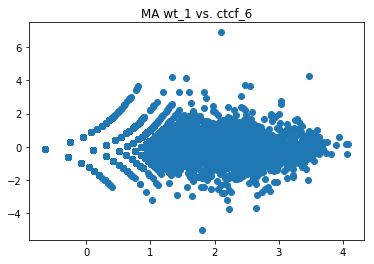

plot_ma.py:40: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,6]) + np.log2(matrix[:,1]))


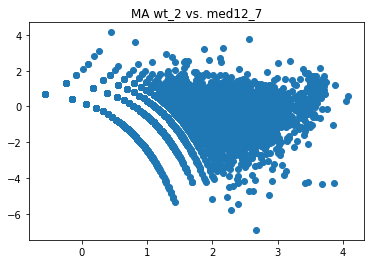

plot_ma.py:49: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,7]) + np.log2(matrix[:,1]))


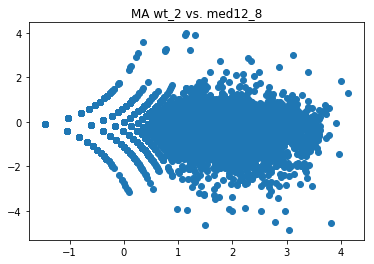

plot_ma.py:58: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,8]) + np.log2(matrix[:,2]))


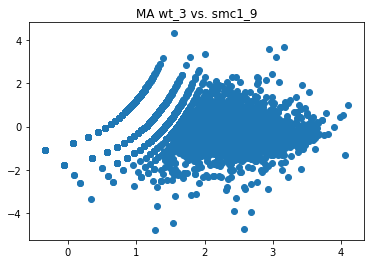

plot_ma.py:66: RuntimeWarning: divide by zero encountered in log2
  a = 0.5 * (np.log2(matrix[:,9]) + np.log2(matrix[:,2]))


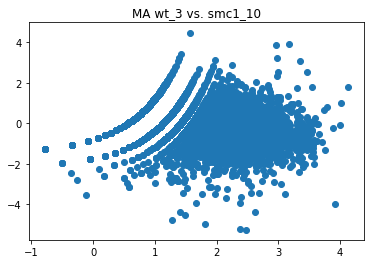

In [2]:
ma_plot(corrected_matrix,new_gene_order,lib_order)

In [2]:
from fishers_exact import *

fishers_exact('output/finalESNPC_tpm_normalized_2_21_2017.txt')

[[ 0  0  0 ...,  1  1  2]
 [ 0  0  0 ...,  0  0  0]
 [42 34 23 ..., 16 16 22]
 ..., 
 [ 0  0  1 ...,  0  0  0]
 [ 5  5  5 ...,  6  6  7]
 [ 0  0  0 ...,  0  0  2]]
10 13041


KeyboardInterrupt: 

In [4]:
import os
import sys
import numpy as np
from math import exp,log,floor,ceil
import pylab
import scipy
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
DTYPE = np.float32
DTYPE_int = np.int32
DTYPE_str = str
PI = np.pi
import numpy as np
from matplotlib.mlab import PCA
from sklearn.preprocessing import StandardScaler


####### Read gene expression data in as a nested list of lists

fname = sys.argv[1]
print fname, "output/final_ESNPC_filtered_logged_TPM_normalized_3_9_2017.txt"

input = open("output/final_ESNPC_filtered_logged_TPM_normalized_3_9_2017.txt", 'r')

data_nested_list=[]
column_names=[]
row_names=[]
ticker=0
for line in input:
        ticker += 1
	if len(line) == 0:
                continue
	elif ticker <= 1001:
		if line.startswith('#'):
                	temp = line.strip('\n').split(' ')
        		column_names.append(temp[0])
	        	column_names.append(temp[1])
                	column_names.append(temp[2])
                	column_names.append(temp[3])
                	column_names.append(temp[4])
                	column_names.append(temp[5])
                	column_names.append(temp[6])
                	column_names.append(temp[7])
                	column_names.append(temp[8])
                	column_names.append(temp[9])
                	column_names.append(temp[10])

		else:
                	temp = line.strip('\n').split(' ')
			row_names.append(temp[0])
			data_nested_list.append([float(temp[1]),float(temp[2]),float(temp[3]),float(temp[4]),float(temp[5]),float(temp[6]),float(temp[7]),float(temp[8]),float(temp[9]),float(temp[10])])

input.close()



####### Convert nested list into an array

data_array = np.array(data_nested_list)
print np.shape(data_array), "here is shape of array"
data_array = np.transpose(data_array)
print np.shape(data_array), "here is shape of array"


-f output/final_ESNPC_filtered_logged_TPM_normalized_3_9_2017.txt
(1000L, 10L) here is shape of array
(10L, 1000L) here is shape of array


In [13]:
####### Convert nested list into an array

data_array = np.array(data_nested_list)
print np.shape(data_array), "here is shape of array"
data_array = np.transpose(data_array)
print np.shape(data_array), "here is shape of array"


####### Standardize the data to mean 0 and variance 1

data_array_std = StandardScaler().fit_transform(data_array)

print len(column_names)
print len(row_names)
print np.shape(data_array_std), "print the shape of the transformed standardized array"
print np.shape(np.transpose(data_array_std)), "print the shape of the transformed standardized array after re-transforming it to compute cov"



########## Step 1 in PCA:  Eigendecomposition of the covariance matrix after standardizing the data


# Compute the covariance matrix for the conditions
cov_mat_cond=np.cov(np.transpose(data_array_std))
#Once you normalize data, compute covaraince matrix


# For future exploration, it is also possible to compute the covariance matrix for genes and do PCA in a gene centric-approach
#cov_mat_gene=np.cov((data_array_std))
#This is done to understand patterns among genes


print "this is the shape of the covariance matrix"
print np.shape(cov_mat_cond)


# Compute eigenvalues, eigenvectors for the conditions and genes

eig_vals_cond, eig_vecs_cond = np.linalg.eigh(cov_mat_cond)

print np.shape(eig_vals_cond), np.shape(eig_vecs_cond)

######## Step 2 in PCA:  Select principal components for the 'conditions question'

# First, make a list of (eigenvalue, eigenvector) tuples

eig_pairs_cond = [(np.abs(eig_vals_cond[i]), eig_vecs_cond[:,i]) for i in range(len(eig_vals_cond))]
#Pair eigenvectors with eigenvalues

# Second, sort the (eigenvalue, eigenvector) tuples from high to low

eig_pairs_cond.sort(key=lambda x: x[0])
eig_pairs_cond.reverse()

#Gets from highest to lowest

#print eig_pairs_cond, "here are eigenvalues and eigenvectors sorted"

# Third, confirm that eigenvalues are sorted by decreasing eigenvalues 
#print eig_pairs_cond
#for i in eig_pairs_cond:
	#print(i[0], i[1], np.shape(i[1]))


# Fourth, we must now answer the difficult/subjective question - "how many principal components are we going to choose for our new feature subspace?"
# One way to determine this is to use the eigenvalues to compute a "variance explained" metric - this metric predicts how much variance can be attributed to each principal component

tot = sum(eig_vals_cond)
var_exp = [(i / tot)*100 for i in sorted(eig_vals_cond, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

print var_exp[0:4], "% of variance explained by the principal components"
print cum_var_exp[0:4], "cumulative % variance explained by the principal components"

(1000L, 10L) here is shape of array
(10L, 1000L) here is shape of array
11
1000
(10L, 1000L) print the shape of the transformed standardized array
(1000L, 10L) print the shape of the transformed standardized array after re-transforming it to compute cov
this is the shape of the covariance matrix
(1000L, 1000L)
(1000L,) (1000L, 1000L)
[38.780116570711797, 18.6415068128467, 9.6189811341235991, 9.0178960300138939] % of variance explained by the principal components
[ 38.78011657  57.42162338  67.04060452  76.05850055] cumulative % variance explained by the principal components


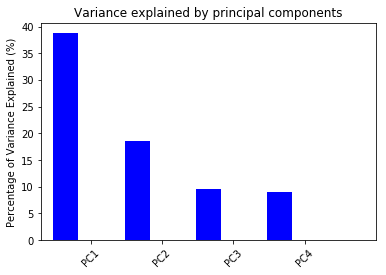

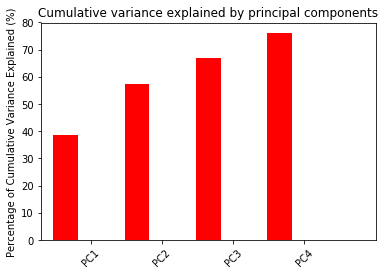

In [14]:
#Plot the above metrics to visualize the percent of the variance explained by each principal component and decide on how many PC's you will choose

fig=pyplot.figure()
index_bar=np.arange(len(var_exp[0:4]))
width=0.35
pyplot.bar(index_bar,var_exp[0:4], width, color='blue')
pyplot.xlim(-width,len(index_bar)+width)
pyplot.ylabel('Percentage of Variance Explained (%)')
pyplot.title('Variance explained by principal components')
xTickMarks = ['PC'+str(i) for i in range(1,5)]
pyplot.xticks(index_bar+width,xTickMarks,rotation=45, fontsize=10)
pyplot.show()

pyplot.figure()
index_bar=np.arange(len(cum_var_exp[0:4]))
width=0.35
pyplot.bar(index_bar,cum_var_exp[0:4], width, color='red')
pyplot.xlim(-width,len(index_bar)+width)
pyplot.ylabel('Percentage of Cumulative Variance Explained (%)')
pyplot.title('Cumulative variance explained by principal components')
xTickMarks = ['PC'+str(i) for i in range(1,5)]
pyplot.xticks(index_bar+width,xTickMarks,rotation=45, fontsize=10)
pyplot.show()

In [15]:
######## Step 3 in PCA: Project the data onto a new feature subspace

# First, create a projection matrix - a matrix of the top k eigenvectors, where k is the # of principal components you have chosen from the analysis above
# I picked the first 2 eigenvalue/eigenvector pairs, but you will need to alter this based on what you find above for your principal components and the % variance explained
#ALTER THIS CODE IF YOU CHOOSE MORE/LESS THAN 2

print np.shape(eig_pairs_cond[0][1])
print np.shape(eig_pairs_cond[1][1])
print np.shape(eig_pairs_cond[0][1].reshape((np.shape(data_array)[1]),1))

matrix_w = np.hstack((eig_pairs_cond[0][1].reshape((np.shape(data_array)[1]),1), eig_pairs_cond[1][1].reshape((np.shape(data_array)[1]),1)))

print 'Matrix W: ', np.shape(matrix_w)
print np.shape(eig_vals_cond), np.shape(eig_vecs_cond)

# Second, project data onto a new feature space

Y=data_array_std.dot(matrix_w)

print Y
print np.shape(Y)
#4 CONDITIONS AND TWO ABSTRACTIONS THAT MATTER

print np.shape(Y[:,0])
print np.shape(Y[:,1])


(1000L,)
(1000L,)
(1000L, 1L)
Matrix W:  (1000L, 2L)
(1000L,) (1000L, 1000L)
[[  1.73469089  -9.2002683 ]
 [ -4.36139652  -9.49360881]
 [  6.99041798  -7.76646348]
 [  2.01588309  -6.053279  ]
 [ 17.13663954   3.00319896]
 [ -4.14410688  -4.91222251]
 [ 23.00197809  14.55748485]
 [-10.09094766  -2.18312186]
 [ -9.8442472    8.50240475]
 [-22.43891131  13.54587541]]
(10L, 2L)
(10L,)
(10L,)


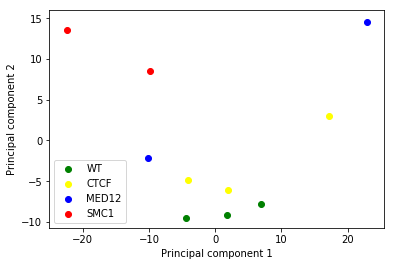

In [25]:
#Plot the first two principle components with the samples

pyplot.figure()
pyplot.scatter(Y[0:3,0],Y[0:3,1],color = 'green', label = 'WT')
pyplot.scatter(Y[3:6,0],Y[3:6,1],color = 'yellow', label = 'CTCF')
pyplot.scatter(Y[6:8,0],Y[6:8,1],color = 'blue', label = 'MED12')
pyplot.scatter(Y[8:10,0],Y[8:10,1],color = 'red', label = 'SMC1')
pyplot.xlabel('Principal component 1')
pyplot.ylabel('Principal component 2')
pyplot.legend(loc = 0)
pyplot.show()




#What happens once you add in more genes?

#To ES replicates kind of clustered